In [1]:
%config IPCompleter.greedy=True

In [2]:
store_location = r"C:\Users\kmtar\py-data-cache"  # Replace with path to store directory on PC to override default
if not store_location:
    store_location = "C:\\stores"
    
import pystore

pystore.set_path(store_location)

WindowsPath('C:/Users/kmtar/py-data-cache')

In [3]:
store = pystore.store("ib")
collection_trades = store.collection("trades-30m")
print(f"{len(collection_trades.list_items())} tickers available in trades-30m")
collection_iv = store.collection("impliedvol-30m")
print(f"{len(collection_iv.list_items())} tickers available in impliedvol-30m")
collection_hv = store.collection("historicalvol-30m")
print(f"{len(collection_hv.list_items())} tickers available in historicalvol-30m")


1 tickers available in trades-30m
1 tickers available in impliedvol-30m
1 tickers available in historicalvol-30m


In [4]:
ticker = "AAPL"
trades = collection_trades.item(ticker)
trades_df = trades.to_pandas()
trades_df

,open,high,low,close,volume,count,average
2020-12-09 09:30:00,124.51,125.95,123.86,125.86,147168.0,56794.0,124.913
2020-12-09 10:00:00,125.87,125.90,124.59,125.09,82090.0,35065.0,125.202
2020-12-09 10:30:00,125.10,125.47,124.80,125.41,48491.0,19838.0,125.128
2020-12-09 11:00:00,125.40,125.44,124.84,125.23,43440.0,18691.0,125.082
2020-12-09 11:30:00,125.23,125.29,124.67,124.90,33392.0,13643.0,124.926
...,...,...,...,...,...,...,...
2021-03-08 13:30:00,118.18,118.22,116.76,116.81,75604.0,33210.0,117.465
2021-03-08 14:00:00,116.80,117.55,116.78,117.52,66140.0,29316.0,117.200
2021-03-08 14:30:00,117.52,117.82,116.97,117.24,56480.0,26315.0,117.348
2021-03-08 15:00:00,117.24,117.25,116.65,116.82,75850.0,36672.0,116.869


<IPython.core.display.Javascript object>


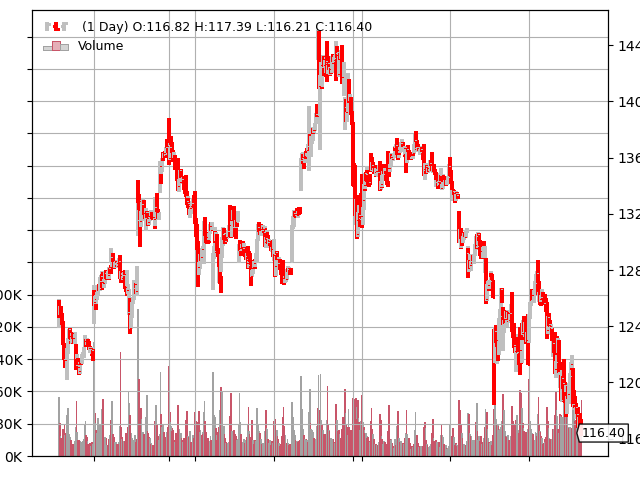

[[<Figure size 640x480 with 2 Axes>]]

In [5]:
import backtrader as bt


# Create a cerebro entity
cerebro = bt.Cerebro(stdstats=False)
cerebro.adddata(bt.feeds.PandasData(dataname=trades_df, openinterest=None))
cerebro.run()
cerebro.plot(style='bar')

But we would rather have all our columns show up in the strategy feed and plot...

<IPython.core.display.Javascript object>


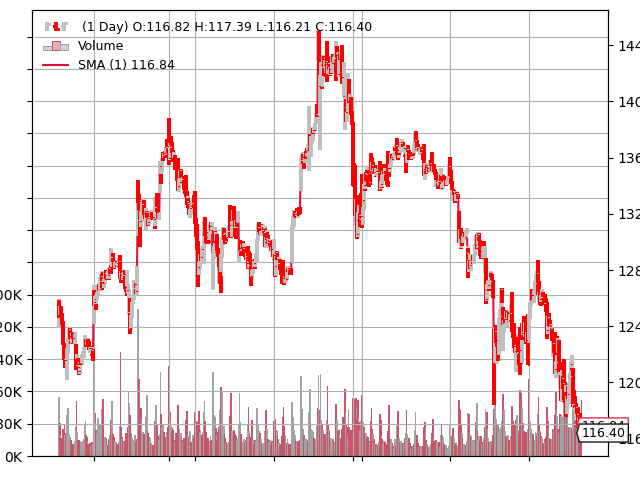

[[<Figure size 640x480 with 2 Axes>]]

In [6]:
import backtrader.indicators as btind

class PandasDataWithWap(bt.feeds.PandasData):

    # Add a 'wap' line to the inherited ones from the base class
    lines = ('average',)

    # add the parameter to the parameters inherited from the base class
    params = (('average', -1),)

class WAPStrategy(bt.Strategy):
    def __init__(self):
        # The indicator autoregisters and will plot even if no obvious
        # reference is kept to it in the class
        btind.SMA(self.data.average, period=1, subplot=False)
    
# Create a cerebro entity
feed = PandasDataWithWap(dataname=trades_df, openinterest=None)
cerebro = bt.Cerebro(stdstats=False)
cerebro.adddata(feed)
cerebro.addstrategy(WAPStrategy)
cerebro.run()
cerebro.plot(style='bar')

<IPython.core.display.Javascript object>


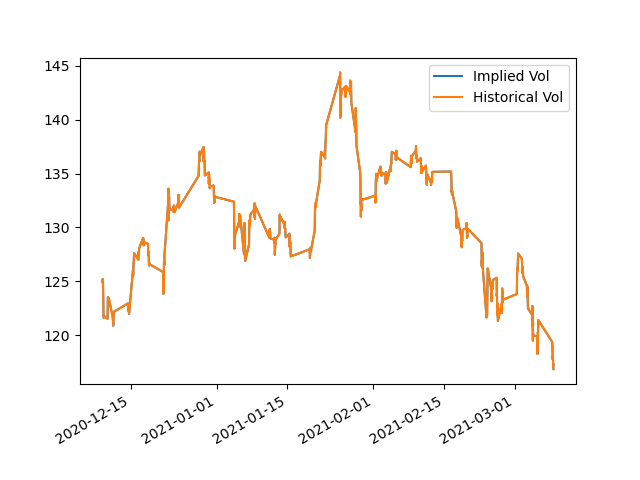

In [7]:
import matplotlib.pyplot as plt
iv = collection_iv.item(ticker)
hv = collection_hv.item(ticker)
iv_df = iv.to_pandas()
hv_df = hv.to_pandas()
fig = plt.figure()
iv_df.average.plot(figure=fig, label="Implied Vol")
hv_df.average.plot(figure=fig, label="Historical Vol")
plt.legend()
plt.show()

                       open    high     low   close    volume    count  \
2020-12-09 09:30:00  124.51  125.95  123.86  125.86  147168.0  56794.0   
2020-12-09 10:00:00  125.87  125.90  124.59  125.09   82090.0  35065.0   
2020-12-09 10:30:00  125.10  125.47  124.80  125.41   48491.0  19838.0   
2020-12-09 11:00:00  125.40  125.44  124.84  125.23   43440.0  18691.0   
2020-12-09 11:30:00  125.23  125.29  124.67  124.90   33392.0  13643.0   
...                     ...     ...     ...     ...       ...      ...   
2021-03-08 13:30:00     NaN     NaN     NaN     NaN       NaN      NaN   
2021-03-08 14:00:00     NaN     NaN     NaN     NaN       NaN      NaN   
2021-03-08 14:30:00     NaN     NaN     NaN     NaN       NaN      NaN   
2021-03-08 15:00:00     NaN     NaN     NaN     NaN       NaN      NaN   
2021-03-08 15:30:00     NaN     NaN     NaN     NaN       NaN      NaN   

                          iv  
2020-12-09 09:30:00  124.913  
2020-12-09 10:00:00  125.202  
2020-12-09 10:30:0

<IPython.core.display.Javascript object>


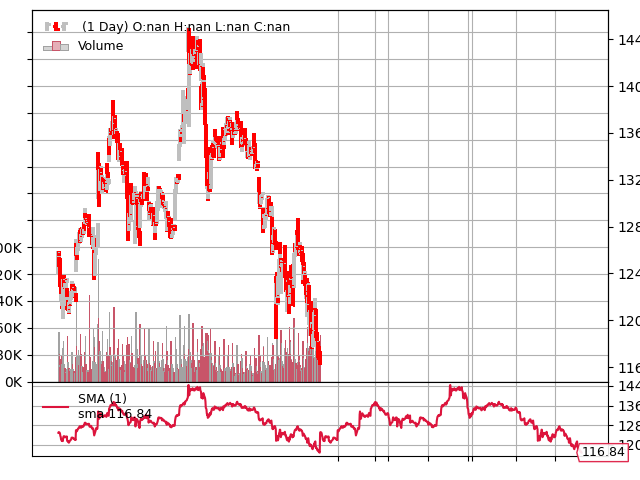

[[<Figure size 640x480 with 3 Axes>]]

In [8]:
import backtrader.indicators as btind
import pandas as pd

class PandasDataWithIV(bt.feeds.PandasData):
    # Add a 'iv' line to the inherited ones from the base class
    lines = ('iv',)

    # add the parameter to the parameters inherited from the base class
    params = (('iv', -1),)

class IVStrategy(bt.Strategy):
    def __init__(self):
        # The indicator autoregisters and will plot even if no obvious
        # reference is kept to it in the class
        btind.SMA(self.data.iv, period=1, subplot=True)

iv_column = iv_df[["average"]]
combined_df = pd.concat([trades_df, iv_column]).rename(columns={"average": "iv"})
print(combined_df)
    
# Create a cerebro entity
feed = PandasDataWithIV(dataname=combined_df, openinterest=None)
cerebro = bt.Cerebro(stdstats=False)
cerebro.adddata(feed)
cerebro.addstrategy(IVStrategy)
cerebro.run()
cerebro.plot(style='bar')